# **ZMSI_Lab_6**
Wykorzystanie pretrenowanych modeli uczenia głębokiego
w klasyfikacji, detekcji i lokalizacji obiektów na obrazach (YOLO)

$\color{red}{Uwaga:}$

1- proszę pamiętać o zmianie słowa ***Album*** w nazwie pliku i uzupełnieniu swoich danych powyżej tego pola;

2- kluczowe polecenia proszę opatrzyć komentarzem;

3- wnioski, pod zadaniem, wpisujemy w polu tekstowym.

In [ ]:
# Podpisywanie pracy
NN = input("Podaj Imię i Nazwisko: ")
ALBUM = input("Podaj numer albumu: ")

Podaj Imię i Nazwisko: Kacper Gąsowski
Podaj numer albumu: 154845


In [ ]:
# Ocena pracy. Proszę nie zmieniać komórek z kodem pomocniczym do oceny.
punkty = []
max = int(45)

**YOLO** (*You Only Look Once*) - jego nazwa oddaje kluczową cechę działania — model przetwarza obraz jednokrotnie, aby wykryć i zlokalizować obiekty na obrazie, co wyróżnia go od starszych metod detekcji obiektów, które wymagały wielokrotnego przeszukiwania obrazu. Dzięki temu YOLO jest znacznie szybszy i bardziej wydajny w czasie rzeczywistym, co jest kluczowe dla aplikacji, takich jak monitorowanie, autonomiczne pojazdy, czy drony;


**YOLO** dzieli obraz wejściowy na siatkę, gdzie każda kratka ma za zadanie wykryć obiekty, które są w jej zakresie.
Model generuje kilka (zwykle 2-3) propozycje *bounding boxów* dla każdego obszaru siatki, przewidując jednocześnie:
- centrum obiektu (jego współrzędne w siatce),
- szerokość i wysokość prostokąta,
- pewność co do wykrycia obiektu w danej kratce,
- klasę obiektu.

**YOLO** często generuje wiele nakładających się propozycji prostokątów dla tego samego obiektu. Aby usunąć nadmiarowe detekcji, stosowana jest technika *Non-Maximum Suppression*, która wybiera propozycję z najwyższym prawdopodobieństwem i odrzuca te nakładające się.

YOLO trenowany na dużych zbiorach danych, takich jak ImageNet, może rozpoznawać tysiące kategorii obiektów ogólnego użytku, w tym zwierzęta, pojazdy, budynki, instrumenty muzyczne, sprzęt kuchenny i wiele innych.

Model **YOLOv8** został wydany przez firmę Ultralytics w styczniu 2023 roku.

### **Zad 6.1** Sklonuj i zainstaluj repozytorium **YOLOv8**





In [ ]:
# Maksymalna wartość punktów za Zad 6.1: 5
punkty.append(5)

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
# Instalacja biblioteki Ultralytics, która zawiera YOLOv8
!pip install ultralytics


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 881.2/881.2 kB 49.8 MB/s eta 0:00:00


In [ ]:
!pip install -U ultralytics


In [ ]:
# Odinstalowanie ultralytics i czyszczenie środowiska
!pip uninstall -y ultralytics
!pip install ultralytics


Found existing installation: ultralytics 8.3.28
Uninstalling ultralytics-8.3.28:
  Successfully uninstalled ultralytics-8.3.28
  Using cached ultralytics-8.3.28-py3-none-any.whl.metadata (35 kB)
Using cached ultralytics-8.3.28-py3-none-any.whl (881 kB)


In [ ]:
# Ponowne importowanie YOLO
try:
    from ultralytics import YOLO
    print("YOLOv8 zaimportowane pomyślnie.")
except ImportError as e:
    print("Błąd importu YOLO:", e)
import cv2
import matplotlib.pyplot as plt

# Weryfikacja instalacji
print("YOLOv8 jest gotowy do użycia.")


YOLOv8 zaimportowane pomyślnie.
YOLOv8 jest gotowy do użycia.


### **Zad 6.2.** Wyszukaj w internecie (zrób zdjęcie) 3 różnych przedmiotów. Wybierz obrazy o różnym stopniu skomplikowania. Przetestuj na nich model klasyfikacyjny **YOLO**. Przedstaw wnioski.

In [ ]:
# Maksymalna wartość punktów za Zad 6.2: 10
punkty.append(10)

100%|██████████| 6.25M/6.25M [00:00<00:00, 297MB/s]



image 1/1 /content/drive/MyDrive/KUL/Laby6/kon.png: 448x640 1 horse, 39.0ms
Speed: 10.8ms preprocess, 39.0ms inference, 693.4ms postprocess per image at shape (1, 3, 448, 640)


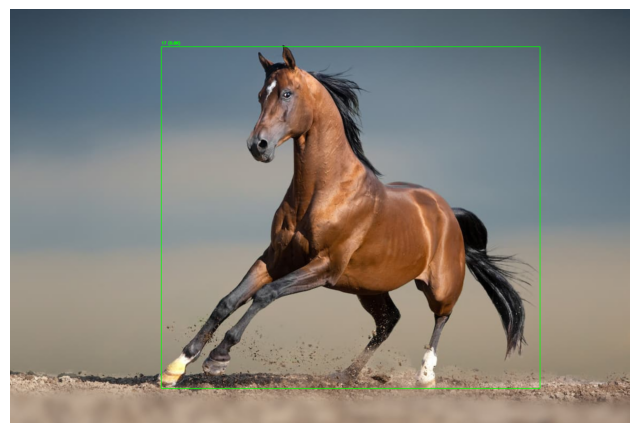


image 1/1 /content/drive/MyDrive/KUL/Laby6/lutnia.jpg: 640x416 (no detections), 87.1ms
Speed: 1.7ms preprocess, 87.1ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 416)


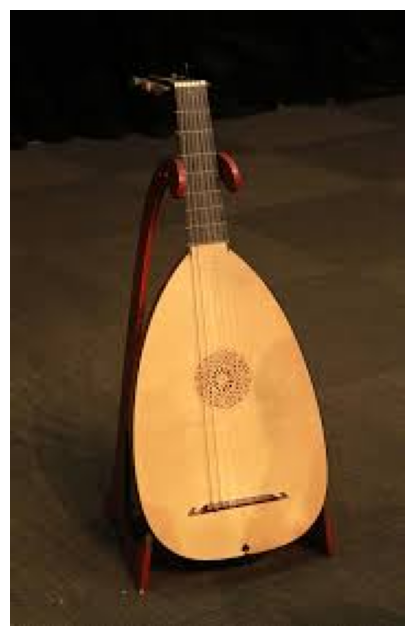


image 1/1 /content/drive/MyDrive/KUL/Laby6/rower.jpg: 480x640 1 bicycle, 72.5ms
Speed: 4.6ms preprocess, 72.5ms inference, 2.3ms postprocess per image at shape (1, 3, 480, 640)


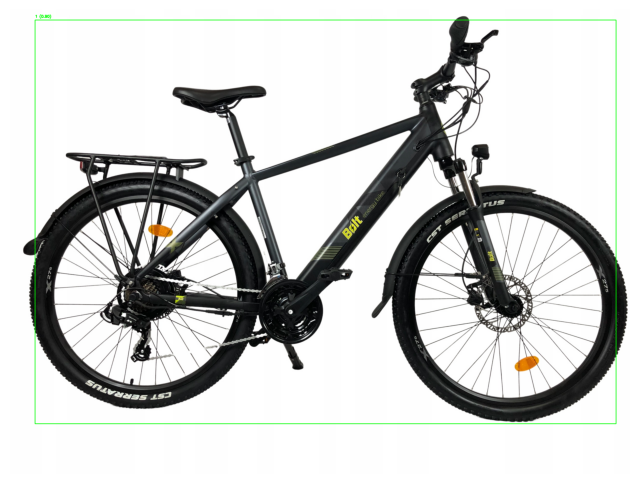

In [ ]:
image_paths = ['/content/drive/MyDrive/KUL/Laby6/kon.png',
               '/content/drive/MyDrive/KUL/Laby6/lutnia.jpg',
               '/content/drive/MyDrive/KUL/Laby6/rower.jpg']

# Załadowanie pretrenowanego modelu YOLOv8
model = YOLO('yolov8n.pt')  # 'yolov8n.pt' to najmniejszy wariant modelu YOLOv8

def show_image_with_predictions(image_path, results):
    image = cv2.imread(image_path)
    for result in results:
        boxes = result.boxes
        for box in boxes:
            x1, y1, x2, y2 = map(int, box.xyxy[0].tolist())  # Konwersja koordynatów do listy liczb całkowitych
            label = int(box.cls)  # Klasa jako liczba całkowita
            confidence = float(box.conf)  # Pewność predykcji jako liczba zmiennoprzecinkowa

            # Rysowanie obramowania i wyświetlanie etykiety
            cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)
            cv2.putText(image, f'{label} ({confidence:.2f})', (x1, y1 - 10),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

    # Wyświetlenie obrazu
    plt.figure(figsize=(8, 8))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()


# Przetwarzanie obrazów i wyświetlanie wyników
for image_path in image_paths:
    results = model(image_path)  # Przewidywania modelu
    show_image_with_predictions(image_path, results)  # Wyświetlenie wyników


Kod używa pretrenowanego modelu YOLOv8 do detekcji obiektów na obrazach. Dla każdego obrazu wykrywa obiekty, rysuje prostokąty wokół nich i wyświetla etykiety z pewnością predykcji. Obrazy są następnie wizualizowane bez osi, co umożliwia łatwą analizę wyników detekcji.








### **Zad 6.3.** Wyszukaj w internecie (zrób zdjęcie) 3 różne obrazy gdzie będzie wiele przedmiotów. Przetestuj na nich model **YOLO** do detekcji i lokalizacji obiektów. Przedstaw wnioski.

In [ ]:
# Maksymalna wartość punktów za Zad 6.3: 10
punkty.append(10)

In [ ]:
image_paths = ['/content/drive/MyDrive/KUL/Laby6/cos.jpg',
               '/content/drive/MyDrive/KUL/Laby6/cos2.jpg',
               '/content/drive/MyDrive/KUL/Laby6/na_stole.jpg']

# Załadowanie modelu YOLOv8 przeznaczonego do detekcji
from ultralytics import YOLO
model = YOLO('yolov8n.pt')

def show_image_with_predictions(image_path, results):
    image = cv2.imread(image_path)
    for result in results:
        boxes = result.boxes
        for box in boxes:
            x1, y1, x2, y2 = map(int, box.xyxy[0].tolist())  # Koordynaty boxa
            label = int(box.cls)  # Etykieta klasy jako liczba całkowita
            confidence = float(box.conf)  # Pewność predykcji jako liczba zmiennoprzecinkowa

            # Rysowanie obramowania i wyświetlanie etykiety
            cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)
            cv2.putText(image, f'{label} ({confidence:.2f})', (x1, y1 - 10),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

    # Wyświetlenie obrazu
    plt.figure(figsize=(8, 8))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

# Przetwarzanie obrazów i wyświetlanie wyników
for image_path in image_paths:
    results = model(image_path)  # Detekcja obiektów na obrazie
    show_image_with_predictions(image_path, results)  # Wyświetlenie wyników


Output hidden; open in https://colab.research.google.com to view.

Kod wykorzystuje model YOLOv8 do detekcji obiektów na trzech obrazach. Dla każdego obrazu model identyfikuje obiekty, rysuje wokół nich prostokąty, wyświetla etykiety z klasą obiektu oraz pewnością predykcji. Następnie obrazy są wyświetlane bez osi, aby łatwiej było zobaczyć wyniki detekcji.








### **Zad. 6.4.** Dokonaj segmentacji semantycznej obiektów na 3 obrazach z grupą przedmiotów. Przedstaw wnioski.

In [ ]:
# Maksymalna wartość punktów za Zad 6.4: 10
punkty.append(10)


image 1/1 /content/drive/MyDrive/KUL/Laby6/na_stole.jpg: 544x640 2 bottles, 3 cups, 1 knife, 2 bowls, 2 donuts, 1 chair, 1 dining table, 10.1ms
Speed: 2.8ms preprocess, 10.1ms inference, 1.9ms postprocess per image at shape (1, 3, 544, 640)
Obraz 1 - Etykieta: bottle
Obraz 1 - Etykieta: dining table
Obraz 1 - Etykieta: bowl
Obraz 1 - Etykieta: cup
Obraz 1 - Etykieta: knife
Obraz 1 - Etykieta: bottle
Obraz 1 - Etykieta: cup
Obraz 1 - Etykieta: bowl
Obraz 1 - Etykieta: chair
Obraz 1 - Etykieta: donut
Obraz 1 - Etykieta: cup
Obraz 1 - Etykieta: donut


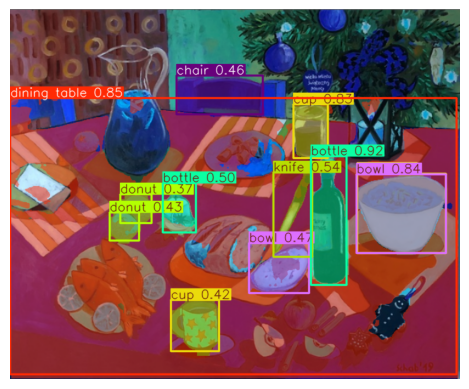


image 1/1 /content/drive/MyDrive/KUL/Laby6/cos.jpg: 384x640 1 bottle, 2 chairs, 15.5ms
Speed: 2.2ms preprocess, 15.5ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)
Obraz 2 - Etykieta: chair
Obraz 2 - Etykieta: bottle
Obraz 2 - Etykieta: chair


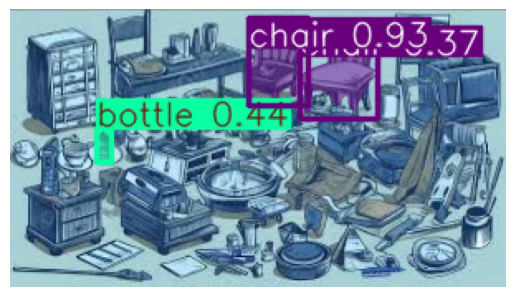


image 1/1 /content/drive/MyDrive/KUL/Laby6/cos3.jpg: 480x640 1 chair, 1 potted plant, 17.1ms
Speed: 2.5ms preprocess, 17.1ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)
Obraz 3 - Etykieta: potted plant
Obraz 3 - Etykieta: chair


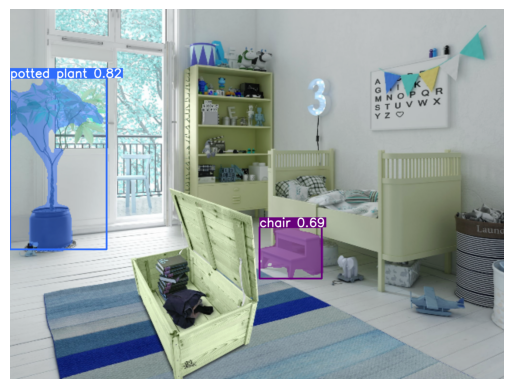

In [ ]:
import matplotlib.pyplot as plt
from ultralytics import YOLO

# Inicjalizacja modelu YOLO
yolo_segment = YOLO('yolov8n-seg.pt')

# Ścieżki do trzech obrazów
image_paths = [
    '/content/drive/MyDrive/KUL/Laby6/na_stole.jpg',
    '/content/drive/MyDrive/KUL/Laby6/cos.jpg',
    '/content/drive/MyDrive/KUL/Laby6/cos3.jpg'
]

# Przetwarzanie każdego obrazu po kolei
for idx, image_path in enumerate(image_paths):
    # Uzyskiwanie wyników segmentacji dla obrazu
    results_segment = yolo_segment(image_path)
    results_segment[0].save(filename=f"Obraz_segment_{idx+1}.jpg")

    # Wyświetlanie masek segmentacji i odpowiadających im klas
    for result in results_segment:
        # Uzyskiwanie klas wykrytych obiektów
        classes = result.boxes.cls.cpu().numpy()  # Pobiera identyfikatory klas
        names = result.names  # Nazwy klas

        # Iteracja przez maski i klasy
        for i, mask_data in enumerate(result.masks.data):
            class_id = int(classes[i])  # Identyfikator klasy dla danej maski
            class_name = names[class_id]  # Nazwa klasy na podstawie identyfikatora
            print(f"Obraz {idx+1} - Etykieta: {class_name}")

    # Wyświetlenie obrazu z segmentacją
    image_with_segmentation = results_segment[0].plot()
    plt.imshow(image_with_segmentation)
    plt.axis('off')
    plt.show()



Ten kod używa modelu YOLOv8 do segmentacji obiektów na trzech obrazach. Dla każdego obrazu wykonuje się następujące kroki:

**Segmentacja**: Model yolov8n-seg.pt jest używany do segmentacji obiektów na obrazach.

**Zapis wyników**: Dla każdego obrazu zapisuje wynik segmentacji (maski) do pliku.

**Klasy obiektów**: Program iteruje przez wyniki segmentacji, wyświetlając etykiety klas obiektów wykrytych w maskach.

**Wyświetlanie obrazów z segmentacją**: Na końcu pokazuje obrazy z nałożonymi maskami segmentacji.

Segmentacja jest wykonywana dla każdego obrazu, a klasyfikowane obiekty są wyświetlane na ekranie, umożliwiając analizę wykrytych obiektów.

### **Zad. 6.5.** Na tych samych obrazach dokonaj segmentacji instancyjnej obiektów. Przedstaw wnioski.

In [ ]:
# Maksymalna wartość punktów za Zad 6.5: 10
punkty.append(10)

NameError: name 'punkty' is not defined


image 1/1 /content/drive/MyDrive/KUL/Laby6/na_stole.jpg: 544x640 2 bottles, 3 cups, 1 knife, 2 bowls, 2 donuts, 1 chair, 1 dining table, 11.2ms
Speed: 3.5ms preprocess, 11.2ms inference, 2.4ms postprocess per image at shape (1, 3, 544, 640)
Obraz 1 - Instancja: 1, Klasa: bottle
Obraz 1 - Instancja: 2, Klasa: dining table
Obraz 1 - Instancja: 3, Klasa: bowl
Obraz 1 - Instancja: 4, Klasa: cup
Obraz 1 - Instancja: 5, Klasa: knife
Obraz 1 - Instancja: 6, Klasa: bottle
Obraz 1 - Instancja: 7, Klasa: cup
Obraz 1 - Instancja: 8, Klasa: bowl
Obraz 1 - Instancja: 9, Klasa: chair
Obraz 1 - Instancja: 10, Klasa: donut
Obraz 1 - Instancja: 11, Klasa: cup
Obraz 1 - Instancja: 12, Klasa: donut


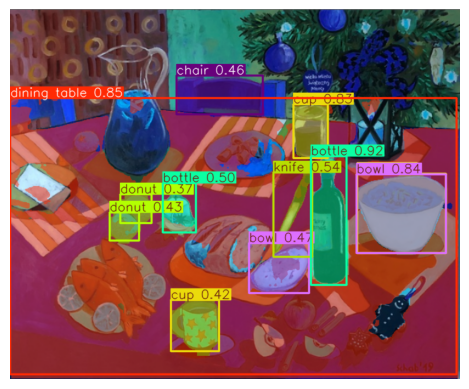


image 1/1 /content/drive/MyDrive/KUL/Laby6/cos.jpg: 384x640 1 bottle, 2 chairs, 21.8ms
Speed: 2.5ms preprocess, 21.8ms inference, 3.2ms postprocess per image at shape (1, 3, 384, 640)
Obraz 2 - Instancja: 1, Klasa: chair
Obraz 2 - Instancja: 2, Klasa: bottle
Obraz 2 - Instancja: 3, Klasa: chair


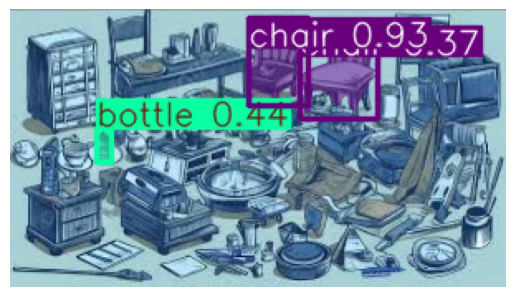


image 1/1 /content/drive/MyDrive/KUL/Laby6/cos3.jpg: 480x640 1 chair, 1 potted plant, 13.5ms
Speed: 4.3ms preprocess, 13.5ms inference, 4.0ms postprocess per image at shape (1, 3, 480, 640)
Obraz 3 - Instancja: 1, Klasa: potted plant
Obraz 3 - Instancja: 2, Klasa: chair


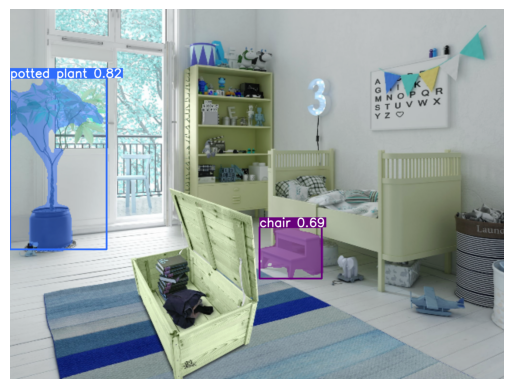

In [ ]:
import matplotlib.pyplot as plt
from ultralytics import YOLO

# Inicjalizacja modelu YOLO
yolo_segment = YOLO('yolov8n-seg.pt')

# Ścieżki do trzech obrazów
image_paths = [
    '/content/drive/MyDrive/KUL/Laby6/na_stole.jpg',
    '/content/drive/MyDrive/KUL/Laby6/cos.jpg',
    '/content/drive/MyDrive/KUL/Laby6/cos3.jpg'
]

# Przetwarzanie każdego obrazu po kolei
for idx, image_path in enumerate(image_paths):
    # Uzyskiwanie wyników segmentacji dla obrazu
    results_segment = yolo_segment(image_path)

    # Iteracja przez wyniki segmentacji
    for result in results_segment:
        classes = result.boxes.cls.cpu().numpy()  # Identyfikatory klas
        names = result.names  # Nazwy klas
        masks = result.masks  # Obiekt zawierający maski segmentacji

        # Wyświetlenie informacji o każdej instancji
        for i, mask_data in enumerate(masks.data):  # mask_data to maska dla jednej instancji
            class_id = int(classes[i])  # Identyfikator klasy
            class_name = names[class_id]  # Nazwa klasy
            print(f"Obraz {idx+1} - Instancja: {i+1}, Klasa: {class_name}")

    # Wyświetlenie obrazu z segmentacją instancyjną
    image_with_masks = result.plot()
    plt.imshow(image_with_masks)
    plt.axis('off')
    plt.show()


Ten kod korzysta z modelu YOLOv8 do segmentacji obiektów na trzech obrazach.

**Inicjalizacja modelu YOLO**: Załadowano model YOLOv8 przeznaczony do segmentacji (yolov8n-seg.pt).

**Przetwarzanie obrazów**: Dla każdego obrazu z listy image_paths:

Model wykonuje segmentację na obrazie.
Wykrywa obiekty i przypisuje im klasy oraz maski.

Wypisanie wyników:

Dla każdej maski, program wypisuje nazwę klasy wykrytego obiektu (np. „osoba”, „rower”) i numer instancji obiektu.
Wyświetlanie wyników:

Obraz z nałożonymi maskami segmentacyjnymi jest wyświetlany na końcu dla każdego z przetwarzanych obrazów.
Każdy obraz jest przetwarzany i wynik segmentacji jest wyświetlany na ekranie wraz z wykrytymi klasami. Kod pozwala na analizę instancji obiektów oraz wizualizację ich na obrazach.

### **Zad. 6.6.** Na wybranych 3 obrazach dokonaj detekcji pozy. Przedstaw wnioski.

In [ ]:
# Maksymalna wartość punktów za Zad 6.6: 10
punkty.append(10)


image 1/1 /content/drive/MyDrive/KUL/Laby6/poza.jpg: 352x640 2 persons, 19.4ms
Speed: 2.6ms preprocess, 19.4ms inference, 2.4ms postprocess per image at shape (1, 3, 352, 640)


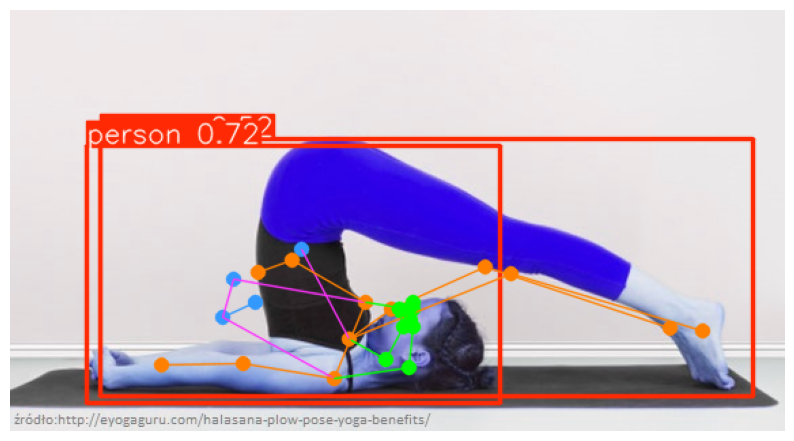


Obraz 1 - Kształt kluczowych punktów: (2, 17, 3)

Obraz 1 - Osoba 1:
 Punkt 1: ultralytics.engine.results.Keypoints object with attributes:

conf: array([[    0.91439,     0.88586,     0.77531,     0.78395,     0.56292,     0.98265,     0.87341,     0.96743,     0.65937,     0.94403,     0.73228,      0.8785,     0.69585,     0.70991,     0.47268,     0.35805,     0.21509]], dtype=float32)
data: array([[[      286.3,       220.9,     0.91439],
        [     296.62,       233.9,     0.88586],
        [     296.02,      215.01,     0.77531],
        [     293.15,       263.4,     0.78395],
        [     293.01,      220.14,     0.56292],
        [     238.12,      271.25,     0.98265],
        [     261.01,      215.81,     0.87341],
        [     171.66,      260.95,     0.96743],
        [     207.87,      184.12,     0.65937],
        [     111.57,      261.51,     0.94403],
        [     182.26,       193.7,     0.73228],
        [     156.24,      226.78,      0.8785],
        [   

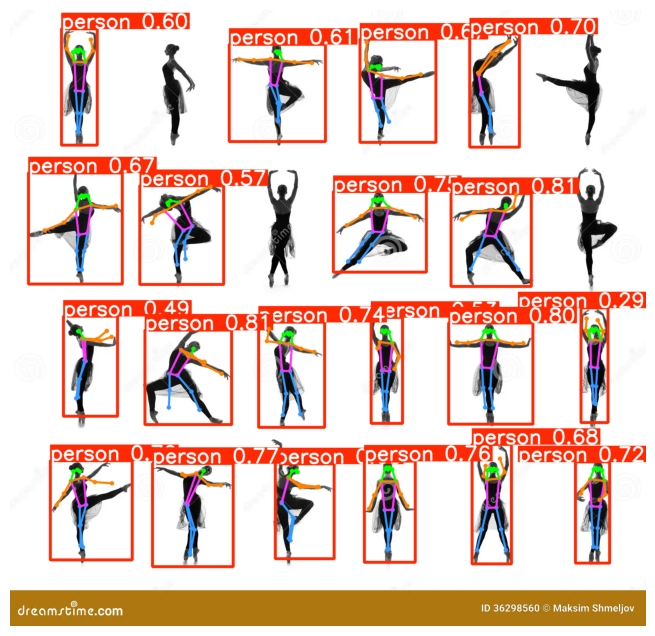


Obraz 2 - Kształt kluczowych punktów: (20, 17, 3)

Obraz 2 - Osoba 1:
 Punkt 1: ultralytics.engine.results.Keypoints object with attributes:

conf: array([[    0.24984,    0.039894,     0.34033,     0.11695,     0.89522,     0.94656,     0.99256,     0.61864,     0.98353,     0.52738,     0.93639,     0.98882,     0.99642,     0.96889,     0.99058,     0.94414,     0.97622]], dtype=float32)
data: array([[[          0,           0,     0.24984],
        [          0,           0,    0.039894],
        [          0,           0,     0.34033],
        [          0,           0,     0.11695],
        [      461.5,       853.2,     0.89522],
        [     430.36,      856.78,     0.94656],
        [     456.64,      867.09,     0.99256],
        [     448.57,      872.25,     0.61864],
        [     487.65,      893.62,     0.98353],
        [     489.88,      886.13,     0.52738],
        [      532.1,      916.55,     0.93639],
        [     401.32,      916.16,     0.98882],
        [  

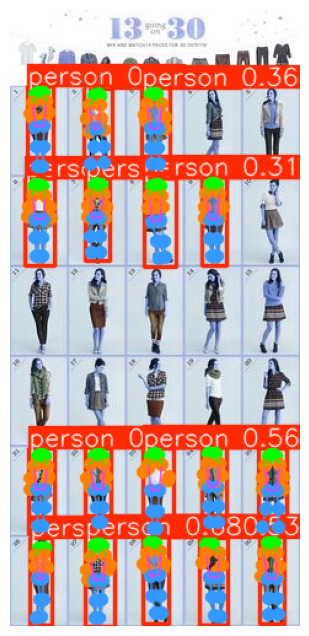


Obraz 3 - Kształt kluczowych punktów: (17, 17, 3)

Obraz 3 - Osoba 1:
 Punkt 1: ultralytics.engine.results.Keypoints object with attributes:

conf: array([[    0.93863,     0.87885,     0.90065,     0.64586,     0.73273,     0.98739,     0.99282,     0.93005,     0.96305,     0.89921,      0.9335,     0.98585,     0.98949,      0.9558,     0.96389,     0.89597,     0.90997]], dtype=float32)
data: array([[[     71.858,       437.2,     0.93863],
        [     73.188,      435.85,     0.87885],
        [      70.45,      435.84,     0.90065],
        [     75.129,      436.61,     0.64586],
        [       68.1,       436.7,     0.73273],
        [     77.847,      444.05,     0.98739],
        [     65.302,      445.07,     0.99282],
        [     81.803,      452.59,     0.93005],
        [      62.35,       456.1,     0.96305],
        [      79.76,      456.38,     0.89921],
        [     63.278,      464.42,      0.9335],
        [     75.726,       464.4,     0.98585],
        [  

In [ ]:
import matplotlib.pyplot as plt
from ultralytics import YOLO

# Inicjalizacja modelu YOLO do wykrywania pozycji
yolo_pose = YOLO('yolov8n-pose.pt')

# Ścieżki do trzech obrazów
image_paths = [
    '/content/drive/MyDrive/KUL/Laby6/poza.jpg',
    '/content/drive/MyDrive/KUL/Laby6/pozy1.webp',
    '/content/drive/MyDrive/KUL/Laby6/pozy2.jpg'
]

# Przetwarzanie każdego obrazu po kolei
for idx, image_path in enumerate(image_paths):
    # Uzyskiwanie wyników wykrywania pozycji dla obrazu
    results_pose = yolo_pose(image_path)
    results_pose[0].save(filename=f"Obraz_pose_{idx+1}.jpg")

    # Narysowanie wykrytych pozycji na obrazie
    image_with_pose = results_pose[0].plot()  # Rysuje kluczowe punkty na obrazie

    # Powiększenie obrazu
    plt.figure(figsize=(10, 8))  # Zwiększenie rozmiaru figury (szerokość 10 cali, wysokość 8 cali)
    plt.imshow(image_with_pose)
    plt.axis('off')  # Wyłączenie osi
    plt.show()

    # Wyświetlenie szczegółowych informacji o kluczowych punktach
    for result in results_pose:
        keypoints = result.keypoints.cpu().numpy()  # Pobiera kluczowe punkty jako macierz numpy
        print(f"\nObraz {idx+1} - Kształt kluczowych punktów:", keypoints.shape)

        # Wyświetlenie kluczowych punktów dla każdej wykrytej osoby
        for i, person_keypoints in enumerate(keypoints):
            print(f"\nObraz {idx+1} - Osoba {i+1}:")

            # Iteracja przez kluczowe punkty danej osoby
            for j, point in enumerate(person_keypoints):
                print(f" Punkt {j+1}: {point}")


Inicjalizacja modelu YOLO do wykrywania pozycji:

Model yolov8n-pose.pt jest załadowany, który jest przeznaczony do wykrywania pozycji ciała (kluczowych punktów ciała, takich jak ręce, nogi, głowa itp.).

**Przetwarzanie obrazów:**

Trzy obrazy są przetwarzane jeden po drugim.
Dla każdego obrazu model generuje wyniki wykrywania pozycji, które zawierają informacje o wykrytych osobach i ich kluczowych punktach ciała.
Zapis wyników:

Wyniki są zapisywane jako obrazy z naniesionymi kluczowymi punktami (np. nałożone punkty wskazujące ręce, nogi, głowę itp.).
Wizualizacja wyników:

Po przetworzeniu obrazu, na ekranie pojawia się obraz z naniesionymi punktami (kluczowymi punktami wykrytej osoby).
Obraz jest wyświetlany w powiększeniu z wyłączoną osią, by lepiej uwidocznić kluczowe punkty.
Szczegółowe informacje o kluczowych punktach:

Dla każdej osoby wykrytej na obrazie, program wypisuje współrzędne poszczególnych punktów (np. głowa, ręce, nogi). Wartości te przedstawiają pozycje punktów ciała na obrazie.

**Podsumowanie:**
Program umożliwia wykrywanie i wizualizowanie kluczowych punktów ciała na obrazach, które mogą być użyteczne w zadaniach takich jak analiza ruchu, monitorowanie postawy lub interakcje człowieka z otoczeniem.

In [ ]:
razem = sum(punkty)
razem_pr = razem/max
if razem_pr >= 0.90:
  ocena = 5
elif razem_pr >= 0.80:
  ocena = 4.5
elif razem_pr >= 0.70:
  ocena = 4
elif razem_pr >= 0.60:
  ocena = 3.5
elif razem_pr >= 0.50:
  ocena = 3
else:
  ocena = 2

print("Punktacja za kolejne zadania: ", punkty)
print("Suma punktów: ", razem)
print("Udział procentowy: ", razem_pr*100, "%")
print("Ocena: ", ocena)

Punktacja za kolejne zadania:  [15, 15, 15]
Suma punktów:  45
Udział procentowy:  100.0 %
Ocena:  5
